In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
import statannot

# Compare DeepCellState variations

In [2]:
import seaborn as sns
sns.set()

In [3]:
res_transCompR = pd.read_csv('../results/TransCompR_results/allgenes_10foldvalidation_transcompr_decoders_1000ep512bs_a375_ht29.csv',index_col=0)
res_transCompR['model'] = 'ANN decoder'
res_transCompR_matrix = pd.read_csv('../results/TransCompR_results/allgenes_10foldvalidation_transcompr_matrixKernel_1000ep512bs_a375_ht29.csv',index_col=0)
res_transCompR_matrix['model'] = 'multi-linear PCR decoder'
baseline = pd.read_csv('../results/baseline_evaluation_allgenes.csv',index_col=0)
baseline = baseline.drop_duplicates()

In [4]:
results = pd.concat([res_transCompR,
                     res_transCompR_matrix],axis=0)

results

,model_pearsonHT29,model_pearsonA375,model_spearHT29,model_spearA375,model_accHT29,model_accA375,recon_pear_ht29,recon_pear_a375,recon_spear_ht29,recon_spear_a375,recon_acc_ht29,recon_acc_a375,model
0,0.646988,0.559911,0.553253,0.492247,0.694567,0.673555,0.855301,0.846577,0.812526,0.794943,0.815974,0.806279,ANN decoder
1,0.580043,0.597295,0.476264,0.484086,0.665774,0.674427,0.845496,0.855556,0.798646,0.794674,0.807935,0.805782,ANN decoder
2,0.678701,0.633806,0.563377,0.534583,0.697407,0.690482,0.832049,0.862449,0.788924,0.815280,0.803988,0.816364,ANN decoder
3,0.589427,0.578064,0.467958,0.467822,0.663682,0.668952,0.838981,0.840884,0.787004,0.795623,0.803606,0.806346,ANN decoder
4,0.661613,0.646906,0.540899,0.537596,0.691919,0.693295,0.869403,0.860909,0.840359,0.808959,0.833310,0.816057,ANN decoder
5,0.572714,0.552361,0.482618,0.459567,0.669031,0.662602,0.869644,0.870845,0.841884,0.833748,0.835783,0.830252,ANN decoder
6,0.517275,0.448766,0.429654,0.385287,0.647088,0.630542,0.861795,0.854774,0.833605,0.820409,0.830092,0.821250,ANN decoder
7,0.613800,0.578690,0.528382,0.453449,0.688293,0.660842,0.877211,0.846940,0.854646,0.813830,0.843838,0.817877,ANN decoder
8,0.504796,0.400220,0.399192,0.322164,0.634823,0.604707,0.853622,0.851408,0.827085,0.814839,0.826753,0.818141,ANN decoder
9,0.547518,0.513790,0.447626,0.419357,0.655919,0.648059,0.846276,0.844722,0.811522,0.813814,0.817515,0.817554,ANN decoder


## A375 trasnlation

In [5]:
res_to_a375 = results.loc[:,['model_pearsonA375','model_spearA375','model_accA375','model']]
res_to_a375.columns = ['pearson','spearman','sign accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_a375']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','sign accuracy','model']
res_to_a375 = pd.concat([res_to_a375,res_baseline],axis=0)
res_to_a375

,pearson,spearman,sign accuracy,model
0,0.559911,0.492247,0.673555,ANN decoder
1,0.597295,0.484086,0.674427,ANN decoder
2,0.633806,0.534583,0.690482,ANN decoder
3,0.578064,0.467822,0.668952,ANN decoder
4,0.646906,0.537596,0.693295,ANN decoder
5,0.552361,0.459567,0.662602,ANN decoder
6,0.448766,0.385287,0.630542,ANN decoder
7,0.578690,0.453449,0.660842,ANN decoder
8,0.400220,0.322164,0.604707,ANN decoder
9,0.513790,0.419357,0.648059,ANN decoder


In [6]:
res_to_a375 = pd.melt(res_to_a375,id_vars=['model'])
res_to_a375.columns = ['model','metric','value']
res_to_a375

,model,metric,value
0,ANN decoder,pearson,0.559911
1,ANN decoder,pearson,0.597295
2,ANN decoder,pearson,0.633806
3,ANN decoder,pearson,0.578064
4,ANN decoder,pearson,0.646906
...,...,...,...
85,direct translation,sign accuracy,0.626368
86,direct translation,sign accuracy,0.590569
87,direct translation,sign accuracy,0.629967
88,direct translation,sign accuracy,0.581735


In [7]:
plt.rcParams["figure.figsize"] = (8, 6)

[Text(0.5, 1.0, ''),
 Text(0.5, 0, 'Performance metric value'),
 Text(0, 0.5, 'models')]

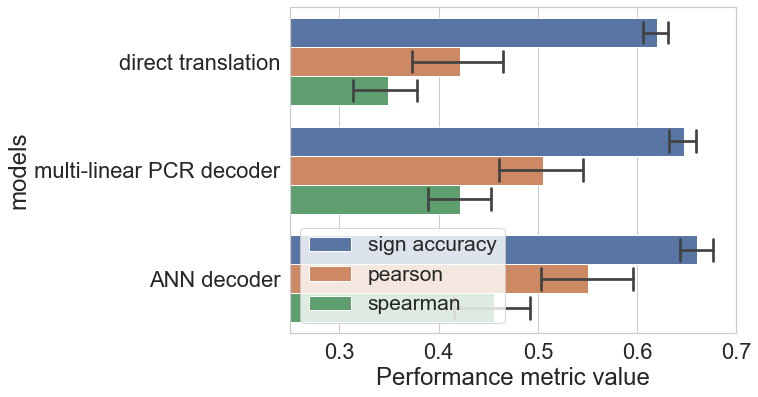

In [8]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(8,7), dpi= 300)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_to_a375,
            order=['direct translation',
                   'multi-linear PCR decoder',
                   'ANN decoder'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.xlim(0.25,0.7)
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='models')

In [9]:
from scipy import stats

In [10]:
models = ['direct translation',
          'multi-linear PCR decoder',
          'ANN decoder']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-10-ee48a8043252>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-10-ee48a8043252>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [11]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-11-2bb75a293747>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
<ipython-input-11-2bb75a293747>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values


In [12]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='sign accuracy'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-12-a9ff6e3ced82>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='sign accuracy'].value.values
<ipython-input-12-a9ff6e3ced82>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='sign accuracy'].value.values


In [14]:
a375_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_translate = a375_translate[['metric','direct translation',
                   'multi-linear PCR decoder',
                   'ANN decoder']]
a375_translate.to_csv('../results/TransCompR_results/a375_all_autoencoders_comparison_allgenes_translation_pvalues_table.csv')
a375_translate

,metric,direct translation,multi-linear PCR decoder,ANN decoder
direct translation,pearson,1.0,0.025748,0.005795
multi-linear PCR decoder,pearson,0.0,1.000000,0.140465
ANN decoder,pearson,0.0,0.000000,1.000000
direct translation,spearman,1.0,0.014019,0.002202
multi-linear PCR decoder,spearman,0.0,1.000000,0.273036
ANN decoder,spearman,0.0,0.000000,1.000000
direct translation,sign accuracy,1.0,0.014019,0.002827
multi-linear PCR decoder,sign accuracy,0.0,1.000000,0.212294
ANN decoder,sign accuracy,0.0,0.000000,1.000000


### Same but for reconstruction

In [15]:
res_recon_a375 = results.loc[:,['recon_pear_a375','recon_spear_a375','recon_acc_a375','model']]
res_recon_a375.columns = ['pearson','spearman','sign accuracy','model']
res_recon_a375

,pearson,spearman,sign accuracy,model
0,0.846577,0.794943,0.806279,ANN decoder
1,0.855556,0.794674,0.805782,ANN decoder
2,0.862449,0.815280,0.816364,ANN decoder
3,0.840884,0.795623,0.806346,ANN decoder
4,0.860909,0.808959,0.816057,ANN decoder
5,0.870845,0.833748,0.830252,ANN decoder
6,0.854774,0.820409,0.821250,ANN decoder
7,0.846940,0.813830,0.817877,ANN decoder
8,0.851408,0.814839,0.818141,ANN decoder
9,0.844722,0.813814,0.817554,ANN decoder


In [16]:
res_recon_a375 = pd.melt(res_recon_a375,id_vars=['model'])
res_recon_a375.columns = ['model','metric','value']
res_recon_a375

,model,metric,value
0,ANN decoder,pearson,0.846577
1,ANN decoder,pearson,0.855556
2,ANN decoder,pearson,0.862449
3,ANN decoder,pearson,0.840884
4,ANN decoder,pearson,0.860909
5,ANN decoder,pearson,0.870845
6,ANN decoder,pearson,0.854774
7,ANN decoder,pearson,0.846940
8,ANN decoder,pearson,0.851408
9,ANN decoder,pearson,0.844722


[Text(0.5, 1.0, ''),
 Text(0.5, 0, 'Performance metric value'),
 Text(0, 0.5, 'models')]

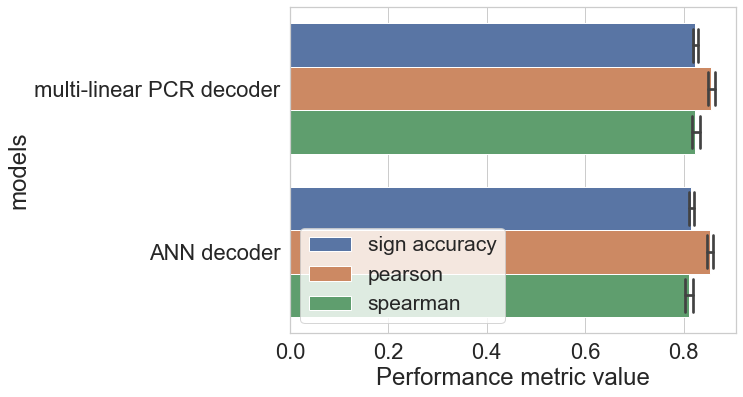

In [17]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_recon_a375,
            order=['multi-linear PCR decoder',
                   'ANN decoder'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)

In [18]:
models = ['multi-linear PCR decoder',
          'ANN decoder']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='pearson'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-18-31aa9ec7923f>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='pearson'].value.values
<ipython-input-18-31aa9ec7923f>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='pearson'].value.values


In [19]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-19-db2d8645d6f5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
<ipython-input-19-db2d8645d6f5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values


In [20]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='sign accuracy'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-20-26171e6f1a72>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='sign accuracy'].value.values
<ipython-input-20-26171e6f1a72>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='sign accuracy'].value.values


In [21]:
a375_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_reconstruction = a375_reconstruction[['metric','multi-linear PCR decoder',
                   'ANN decoder']]
a375_reconstruction.to_csv('../results/TransCompR_results/a375_all_autoencoders_comparison_allgenes_reconstruction_pvalues_table.csv')
a375_reconstruction

,metric,multi-linear PCR decoder,ANN decoder
multi-linear PCR decoder,pearson,1.0,0.677585
ANN decoder,pearson,0.0,1.000000
multi-linear PCR decoder,spearman,1.0,0.140465
ANN decoder,spearman,0.0,1.000000
multi-linear PCR decoder,sign accuracy,1.0,0.140465
ANN decoder,sign accuracy,0.0,1.000000


## HT29 trasnlation

In [22]:
res_to_ht29 = results.loc[:,['model_pearsonHT29','model_spearHT29','model_accHT29','model']]
res_to_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_ht29']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','sign accuracy','model']
res_to_ht29 = pd.concat([res_to_ht29,res_baseline],axis=0)
res_to_ht29

,pearson,spearman,sign accuracy,model
0,0.646988,0.553253,0.694567,ANN decoder
1,0.580043,0.476264,0.665774,ANN decoder
2,0.678701,0.563377,0.697407,ANN decoder
3,0.589427,0.467958,0.663682,ANN decoder
4,0.661613,0.540899,0.691919,ANN decoder
5,0.572714,0.482618,0.669031,ANN decoder
6,0.517275,0.429654,0.647088,ANN decoder
7,0.613800,0.528382,0.688293,ANN decoder
8,0.504796,0.399192,0.634823,ANN decoder
9,0.547518,0.447626,0.655919,ANN decoder


In [23]:
res_to_ht29 = pd.melt(res_to_ht29,id_vars=['model'])
res_to_ht29.columns = ['model','metric','value']
res_to_ht29

,model,metric,value
0,ANN decoder,pearson,0.646988
1,ANN decoder,pearson,0.580043
2,ANN decoder,pearson,0.678701
3,ANN decoder,pearson,0.589427
4,ANN decoder,pearson,0.661613
...,...,...,...
85,direct translation,sign accuracy,0.626368
86,direct translation,sign accuracy,0.590569
87,direct translation,sign accuracy,0.629967
88,direct translation,sign accuracy,0.581735


(0.25, 0.7)

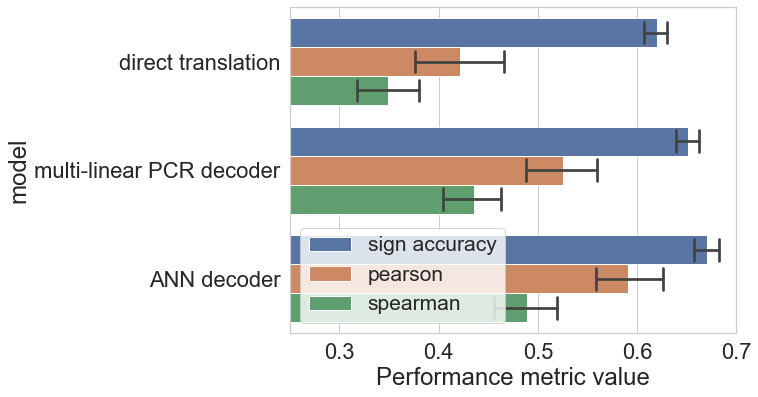

In [24]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_to_ht29,
            order=['direct translation',
                   'multi-linear PCR decoder',
                   'ANN decoder'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='model')
plt.xlim(0.25,0.7)

In [25]:
models = ['direct translation',
          'multi-linear PCR decoder',
          'ANN decoder']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-25-345eca340f28>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
<ipython-input-25-345eca340f28>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values


In [26]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-26-2b2bd44095e3>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
<ipython-input-26-2b2bd44095e3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values


In [27]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='sign accuracy'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-27-cfb7e48ca1ad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='sign accuracy'].value.values
<ipython-input-27-cfb7e48ca1ad>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='sign accuracy'].value.values


In [28]:
ht29_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_translate = ht29_translate[['metric','direct translation',
                   'multi-linear PCR decoder',
                   'ANN decoder']]
ht29_translate.to_csv('../results/TransCompR_results/ht29_all_autoencoders_comparison_allgenes_translation_pvalues_table.csv')
ht29_translate

,metric,direct translation,multi-linear PCR decoder,ANN decoder
direct translation,pearson,1.0,0.007285,0.000330
multi-linear PCR decoder,pearson,0.0,1.000000,0.053903
ANN decoder,pearson,0.0,0.000000,1.000000
direct translation,spearman,1.0,0.004586,0.000330
multi-linear PCR decoder,spearman,0.0,1.000000,0.088973
ANN decoder,spearman,0.0,0.000000,1.000000
direct translation,sign accuracy,1.0,0.009108,0.000330
multi-linear PCR decoder,sign accuracy,0.0,1.000000,0.140465
ANN decoder,sign accuracy,0.0,0.000000,1.000000


### Same but for reconstruction

In [29]:
res_recon_ht29 = results.loc[:,['recon_pear_ht29','recon_spear_ht29','recon_acc_ht29','model']]
res_recon_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_recon_ht29

,pearson,spearman,sign accuracy,model
0,0.855301,0.812526,0.815974,ANN decoder
1,0.845496,0.798646,0.807935,ANN decoder
2,0.832049,0.788924,0.803988,ANN decoder
3,0.838981,0.787004,0.803606,ANN decoder
4,0.869403,0.840359,0.833310,ANN decoder
5,0.869644,0.841884,0.835783,ANN decoder
6,0.861795,0.833605,0.830092,ANN decoder
7,0.877211,0.854646,0.843838,ANN decoder
8,0.853622,0.827085,0.826753,ANN decoder
9,0.846276,0.811522,0.817515,ANN decoder


In [30]:
res_recon_ht29 = pd.melt(res_recon_ht29,id_vars=['model'])
res_recon_ht29.columns = ['model','metric','value']
res_recon_ht29

,model,metric,value
0,ANN decoder,pearson,0.855301
1,ANN decoder,pearson,0.845496
2,ANN decoder,pearson,0.832049
3,ANN decoder,pearson,0.838981
4,ANN decoder,pearson,0.869403
5,ANN decoder,pearson,0.869644
6,ANN decoder,pearson,0.861795
7,ANN decoder,pearson,0.877211
8,ANN decoder,pearson,0.853622
9,ANN decoder,pearson,0.846276


[Text(0.5, 1.0, ''),
 Text(0.5, 0, 'Performance metric value'),
 Text(0, 0.5, 'model')]

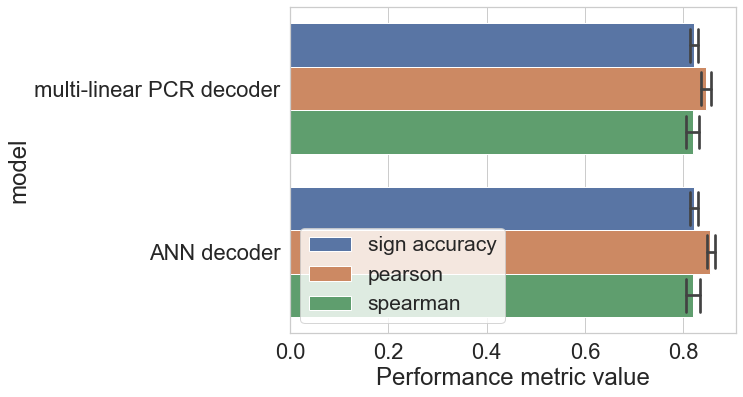

In [31]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_recon_ht29,
            order=['multi-linear PCR decoder',
                   'ANN decoder'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='model')
#plt.ylim(0,1.0)

In [32]:
models = ['multi-linear PCR decoder',
          'ANN decoder']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-32-a0282d917b77>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
<ipython-input-32-a0282d917b77>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values


In [33]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-33-d8298965d0b4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
<ipython-input-33-d8298965d0b4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values


In [34]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='sign accuracy'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-34-9d6d1f9e8d53>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='sign accuracy'].value.values
<ipython-input-34-9d6d1f9e8d53>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='sign accuracy'].value.values


In [35]:
ht29_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_reconstruction = ht29_reconstruction[['metric','multi-linear PCR decoder',
                   'ANN decoder']]
ht29_reconstruction.to_csv('../results/TransCompR_results/ht29_all_autoencoders_comparison_allgenes_reconstruction_pvalues_table.csv')
ht29_reconstruction

,metric,multi-linear PCR decoder,ANN decoder
multi-linear PCR decoder,pearson,1.0,0.344704
ANN decoder,pearson,0.0,1.000000
multi-linear PCR decoder,spearman,1.0,0.909722
ANN decoder,spearman,0.0,1.000000
multi-linear PCR decoder,sign accuracy,1.0,0.909722
ANN decoder,sign accuracy,0.0,1.000000


# Combine the barplots from the two cell-lines into one figure with 2 panels

In [36]:
plt.rcParams["figure.figsize"] = (6, 3)

<ipython-input-37-99edd6421da0>:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


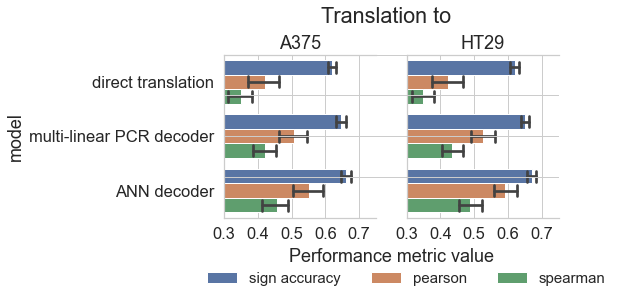

In [37]:

sns.set_theme(style="whitegrid",font_scale=1.5)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

ax = sns.barplot(ax=axes[0],x="value", y="model", data=res_to_a375,
            order=['direct translation',
                   'multi-linear PCR decoder',
                   'ANN decoder'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[0].legend_.remove()

ax = sns.barplot(ax=axes[1],x="value", y="model", data=res_to_ht29,
            order=['direct translation',
                   'multi-linear PCR decoder',
                   'ANN decoder'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[1].legend_.remove()

# Fix axes titles and ticks
axes[0].set_xlim([0.3, 0.75])  # Set x-limit for the first subplot
axes[0].set_xticks([0.3,0.4,0.5,0.6,0.7])  # Set x-ticks for the first subplot
axes[1].set_xlim([0.3, 0.75])  # Set x-limit for the second subplot
axes[1].set_xticks([0.3,0.4,0.5,0.6,0.7])  # Set x-ticks for the second subplot
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticks([])

legend_labels = ['sign accuracy','pearson','spearman']
# Get the handles and labels from any of the subplots
handles, labels = axes[0].get_legend_handles_labels()
ax.legend(handles=handles, 
          labels=legend_labels, 
          title='', 
          loc='lower center', 
          bbox_to_anchor=(0, -0.5), 
          ncol=len(legend_labels), 
          frameon=False,
          fontsize='small')

# set titles
axes[0].title.set_text('A375')
axes[1].title.set_text('HT29')
fig.suptitle('Translation to',y=1.1)

# # Add a common x-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xticks([])
plt.xlabel("Performance metric value", labelpad=30)

# Remove borders of subplots
for ax in axes:
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

plt.tight_layout()
# Adjust subplot spacing
# plt.subplots_adjust(wspace=1)

plt.savefig('../article_supplementary_info/supplementary_fig2_translation.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [38]:
plt.rcParams["figure.figsize"] = (6, 3)

<ipython-input-40-65be30087db5>:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


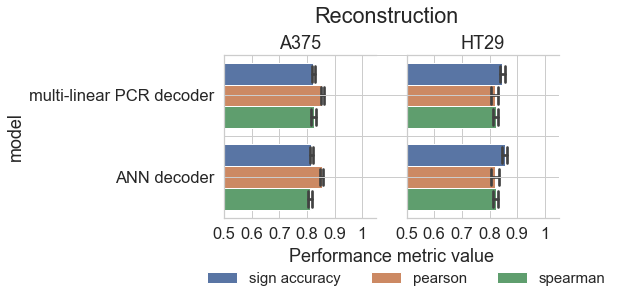

In [40]:
sns.set_theme(style="whitegrid",font_scale=1.5)
# plt.figure(figsize=(9,12), dpi= 80)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2,sharex=False)

ax = sns.barplot(ax=axes[0],x="value", y="model", data=res_recon_a375,
            order=['multi-linear PCR decoder',
                   'ANN decoder'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[0].legend_.remove()

ax = sns.barplot(ax=axes[1],x="value", y="model", data=res_recon_ht29,
            order=['multi-linear PCR decoder',
                   'ANN decoder'],
            hue="metric",ci=95,capsize=0.2,orient='h')
axes[1].legend_.remove()

# Fix axes titles and ticks
# For subplot 1
axes[0].set_xlim([0.5, 1.05])  # Set x-limit for the first subplot
axes[0].set_xticks([0.5,0.6,0.7,0.8,0.9,1])  # Set x-ticks for the first subplot
axes[0].set_xticklabels([0.5,0.6,0.7,0.8,0.9,1])
axes[0].set_xlabel("")

# For the second subplot
axes[1].set_xlim([0.5, 1.05])  # Set x-limit for the second subplot
axes[1].set_xticks([0.5,0.6,0.7,0.8,0.9,1])  # Set x-ticks for the second subplot
axes[1].set_xticklabels([0.5,0.6,0.7,0.8,0.9,1])
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticks([])

legend_labels = ['sign accuracy','pearson','spearman']
# Get the handles and labels from any of the subplots
handles, labels = axes[0].get_legend_handles_labels()
ax.legend(handles=handles, 
          labels=legend_labels, 
          title='', 
          loc='lower center', 
          bbox_to_anchor=(0, -0.5), 
          ncol=len(legend_labels), 
          frameon=False,
          fontsize='small')

# set titles
axes[0].title.set_text('A375')
axes[1].title.set_text('HT29')
fig.suptitle('Reconstruction',y=1.1)

# # Add a common x-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xticks([])
plt.xlabel("Performance metric value", labelpad=30)

# Remove borders of subplots
for ax in axes:
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

plt.tight_layout()
# Adjust subplot spacing
# plt.subplots_adjust(wspace=1)

plt.savefig('../article_supplementary_info/supplementary_fig2_reconstruction.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)